<a href="https://colab.research.google.com/github/tebzamakabate/Data-Science/blob/main/Customer_Churn_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("telco.xls")
data.head()

,Row,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,5678-VFNEQ,Female,0,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.10,7412.25,No
1,2,5977-CKHON,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039,No
2,3,2692-BUCFV,Male,1,No,No,29,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.45,2948.6,No
3,4,7861-UVUFT,Female,0,Yes,No,15,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.30,1308.4,Yes
4,5,1830-GGFNM,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row               5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.isnull().sum()

Row                 0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [ ]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [ ]:
data.shape

(5634, 22)

In [ ]:
data['Churn'].value_counts()

No     4139
Yes    1495
Name: Churn, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

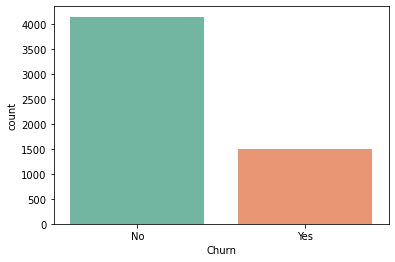

In [ ]:
# Visualize the customer churn.

sns.countplot(data['Churn'], palette='Set2')

<AxesSubplot:xlabel='gender', ylabel='count'>

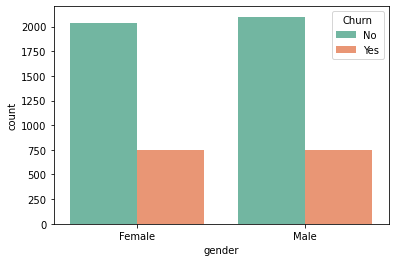

In [ ]:
# Visualize the customer churn per gender.

sns.countplot(x='gender', hue='Churn', palette='Set2', data=data)

#### Gender does not appear to be a significant factor when it comes to customer churn.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

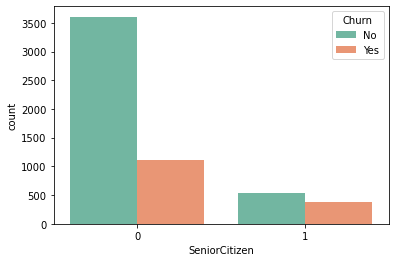

In [ ]:
# Visualize the churn in relation to the age of the customer.

sns.countplot(x='SeniorCitizen', hue='Churn', palette='Set2', data=data)

#### Majority of the customers that churn are not senior citizens.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

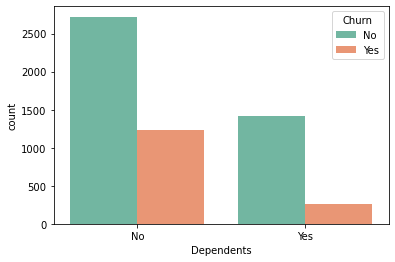

In [ ]:
# Visualize the customer churn in relation to the dependents variable.

sns.countplot(x='Dependents', hue='Churn', palette='Set2', data=data)

#### Majority of the customers that left the company did not have dependents.

<AxesSubplot:xlabel='Partner', ylabel='count'>

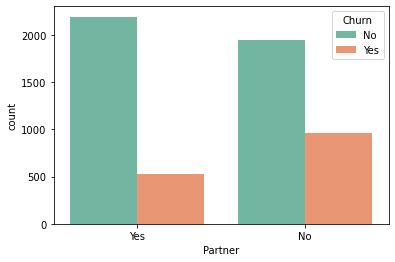

In [ ]:
# Visualize the customer churn in relation to the partner variable.

sns.countplot(x='Partner', hue='Churn', palette='Set2', data=data)

####  It appears that most of the customers that churn, do not have partners.

<AxesSubplot:xlabel='Contract', ylabel='count'>

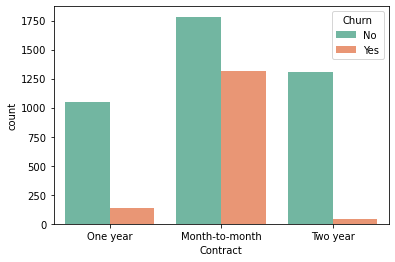

In [ ]:
# Visualize the customer churn in relation to the contract.

sns.countplot(x='Contract', hue='Churn', palette='Set2', data=data)

#### Month-to-month contracts seem to have the highest amount of churned customers, while 2-year contracts have the least amount of churned customers, followed by 1-year contracts.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

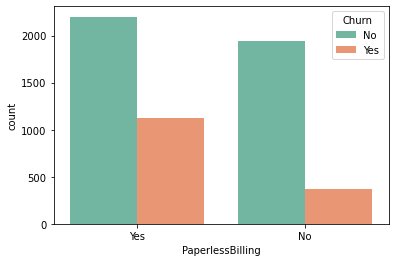

In [ ]:
# Visualize the customer churn in relation to the paperless billing service.

sns.countplot(x='PaperlessBilling', hue='Churn', palette='Set2', data=data)

#### The majority of the customers that left the company had opted for paperless billing.

[Text(0, 0, 'Credit card (automatic)'),
 Text(1, 0, 'Bank transfer (automatic)'),
 Text(2, 0, 'Electronic check'),
 Text(3, 0, 'Mailed check')]

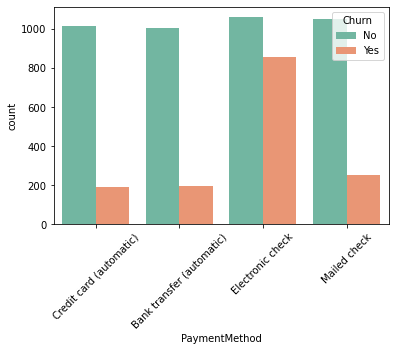

In [ ]:
# Visualize the customer churn in relation to the payment method.

cplt=sns.countplot(x='PaymentMethod', hue='Churn', palette='Set2', data=data)
cplt.set_xticklabels(cplt.get_xticklabels(), rotation=45)

#### Most of the customers that churned had chosen the electronic check as the payment method. 
#### There is a significant difference between this payment method and the automatic ones (bank transfer, credit card) as well as the mailed check.

Text(0.5, 1.0, 'Tenure')

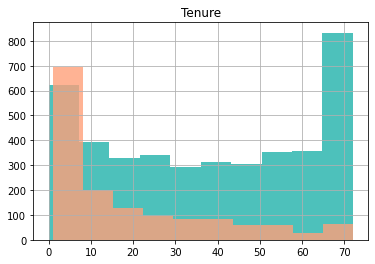

In [ ]:
# Visualize the customer churn in relation to the number of months the customer has stayed with the company.

data[data.Churn == 'No']['tenure'].hist(bins=10, color='lightseagreen', alpha=0.8)
data[data.Churn == 'Yes']['tenure'].hist(bins=10, color='lightsalmon', alpha=0.8)
plt.title('Tenure')

#### Between 0 and 8 months, the possibility of a customers churning is high. However, the longer a customers stays in the company, the less likely he/she is to churn.

Text(0.5, 1.0, 'Monthly Charges')

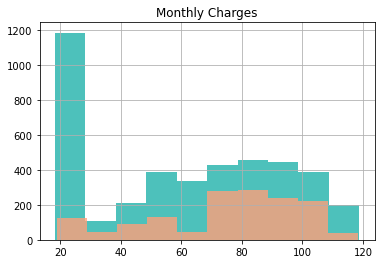

In [ ]:
# Visualize the customer churn in relation to the customer's monthly charges.

data[data.Churn == 'No']['MonthlyCharges'].hist(bins=10, color='lightseagreen', alpha=0.8)
data[data.Churn == 'Yes']['MonthlyCharges'].hist(bins=10, color='lightsalmon', alpha=0.8)
plt.title('Monthly Charges')

#### The lower the amount of charges per month, the less likely the customer will churn. 
#### Especially for the range 18-28 dollars/month, the customer retention is extremely high. 
#### However, as the monthly charges increase, the probability of a customer churning increases as well.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

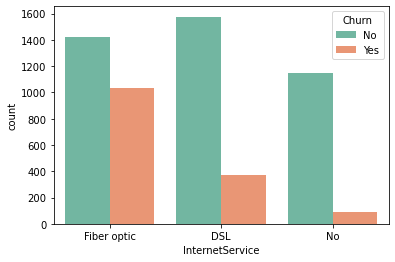

In [ ]:
# Visualize the customer churn in relation to the internet service variable.

sns.countplot(x='InternetService', hue='Churn', palette='Set2', data=data)

####  Majority of the customers that left the company had fiber optics, while the majority of the retained customers had a DSL internet service.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

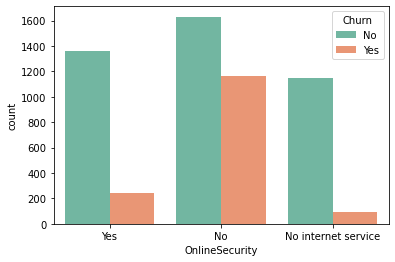

In [ ]:
# Visualize the customer churn in relation to the online security variable.

sns.countplot(x='OnlineSecurity', hue='Churn', palette='Set2', data=data)

#### The majority of the customers that churned, did not have an online security.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

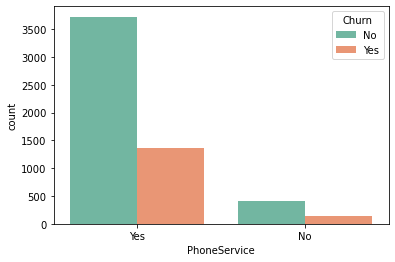

In [ ]:
# Visualize the customer churn in relation to the phone service variable.

sns.countplot(x='PhoneService', hue='Churn', palette='Set2', data=data)

#### Most of the customers that get retained, already have a phone service with the company

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

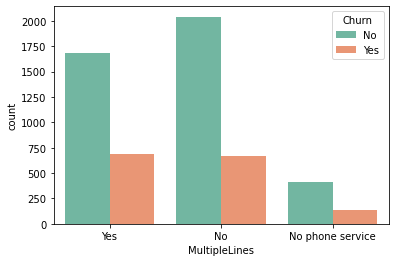

In [ ]:
# Visualize the customer churn in relation to the multiple lines variable.

sns.countplot(x='MultipleLines', hue='Churn', palette='Set2', data=data)

#### The multiple lines service does not appear to be a significant factor when it comes to customer churn.


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

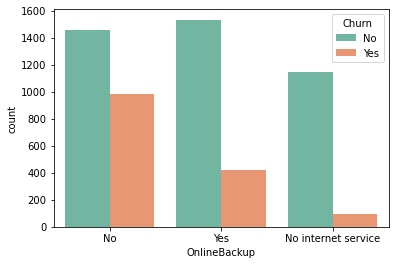

In [ ]:
# Visualize the customer churn in relation to the online backup variable.

sns.countplot(x='OnlineBackup', hue='Churn', palette='Set2', data=data)

#### The majority of the customers that left the company did not have an online backup service.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

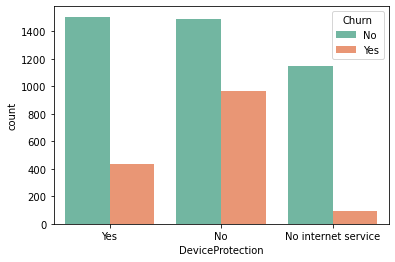

In [ ]:
# Visualize the customer churn in relation to the device protection variable.

sns.countplot(x='DeviceProtection', hue='Churn', palette='Set2', data=data)

#### Most of the churned customers did not have a device protection service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

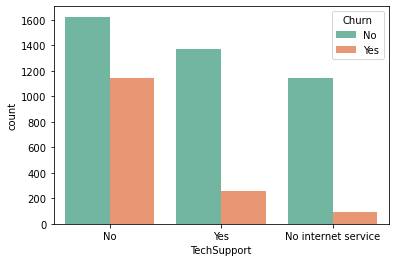

In [ ]:
# Visualize the customer churn in relation to the tech support service.

sns.countplot(x='TechSupport', hue='Churn', palette='Set2', data=data)

#### Majority of the customers that churned did not have a tech support service.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

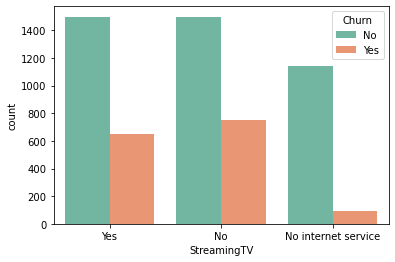

In [ ]:
# Visualize the customer churn in relation to the streamingTV service.

sns.countplot(x='StreamingTV', hue='Churn', palette='Set2', data=data)

#### The streaming tv service does not appear to be significant when it comes to customer churn.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

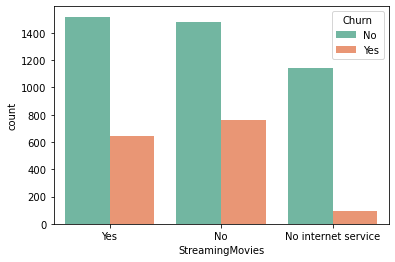

In [ ]:
# Visualize the customer churn in relation to the streamingMovies service.

sns.countplot(x='StreamingMovies', hue='Churn', palette='Set2', data=data)

#### The streaming movies service does not appear to be a significant factor for customer churn.

In [ ]:
# Drop the column customerID, since it is not necessary for our analysis.

data_df = data.drop(['Row','customerID'], axis=1)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 


In [ ]:
data_df.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [ ]:
dummy_df = pd.get_dummies(data_df)

In [ ]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5634 non-null   int64  
 1   tenure                                   5634 non-null   int64  
 2   MonthlyCharges                           5634 non-null   float64
 3   TotalCharges                             5634 non-null   float64
 4   Churn                                    5634 non-null   int64  
 5   gender_Female                            5634 non-null   uint8  
 6   gender_Male                              5634 non-null   uint8  
 7   Partner_No                               5634 non-null   uint8  
 8   Partner_Yes                              5634 non-null   uint8  
 9   Dependents_No                            5634 non-null   uint8  
 10  Dependents_Yes                           5634 no

In [ ]:
# Establish target feature, churn
y = dummy_df.Churn.values

# Drop the target feature from remaining features
X = dummy_df.drop('Churn', axis = 1)

# Save dataframe column titles to list, we will need them in next step
cols = X.columns

In [ ]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler

# Instantiate a Min-Max scaling object
mm = MinMaxScaler()

# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [ ]:
# Split to separate our data into a training set and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')

In [ ]:
# Fit the model to our X and y training sets

logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [ ]:
y_hat_train = logreg.predict(X_train)

# Perform prediction using the test dataset
y_hat_test = logreg.predict(X_test)

In [ ]:
# Print the scores of the training and testing set to check for overfitting.

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8099
Test set score: 0.7991


#### The training set accuracy score is 0.8099, while the test set accuracy is 0.7991.

In [ ]:
from sklearn.metrics import confusion_matrix

# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)

In [ ]:
# Confusion matrix.

cm = confusion_matrix(y_test, y_hat_test)

print('Confusion matrix\n\n', cm)

print('\nThe confusion matrix shows', cm[0,0] + cm[1,1],'correct predictions and', cm[1,0] + cm[0,1], 'incorrect predictions.')

print('\nMore Specifically: ')

print('\n-True Positives (Actual Positive:1 and Predict Positive:1) = ', cm[0,0])

print('\n-True Negatives (Actual Negative:0 and Predict Negative:0) = ', cm[1,1])

print('\n-False Positives (Actual Negative:0 but Predict Positive:1) = ', cm[0,1], '(Type I error)')

print('\n-False Negatives (Actual Positive:1 but Predict Negative:0) = ', cm[1,0], '(Type II error)')

Confusion matrix

 [[926 113]
 [170 200]]

The confusion matrix shows 1126 correct predictions and 283 incorrect predictions.

More Specifically: 

-True Positives (Actual Positive:1 and Predict Positive:1) =  926

-True Negatives (Actual Negative:0 and Predict Negative:0) =  200

-False Positives (Actual Negative:0 but Predict Positive:1) =  113 (Type I error)

-False Negatives (Actual Positive:1 but Predict Negative:0) =  170 (Type II error)


In [ ]:
# We check its precision, recall, f1-score and accuracy.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1039
           1       0.64      0.54      0.59       370

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



### Retained customers:
#### The precision of the model is 84%, meaning that 84% of the results are relevant.
#### The recall of the model is 89%, meaning that 89% of the total relevant results were correctly classified by the model.
#### The f1-score measuring the model's accuracy on the dataset is 87%, which is an ok result.

### Churned customers:
#### The precision of the model is 64%, meaning that 64% of the results are relevant.
#### The recall of the model is 54%, meaning that 54% of the total relevant results were correctly classified by the model.
#### The f1-score measuring the model's accuracy on the dataset is 59%, which is an ok result.

### The accuracy of the model is 80%, which indicates great model performance.

## Recommendations for customer retention

- Consider lowering the monthly charges to increase customer retention.
- Focus our efforts on the aquisition period of new customers (0-8 months), since the probabilities of customer churning are higher during that period.
- Investigate possible service quality issues with its fiber optic service and -if that's the case- we work on resolving them.
- Consider proposing contracts with a starting duration of 1-2 year(s), since the churning probabilities are significantly lower in contrast to the month-to-month contracts.